In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [11]:
##data preprocessing
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [12]:
# Input shape and number of classes
input_shape = X_train.shape[1:]   # (28, 28, 1)
num_classes = len(np.unique(y_train))

In [13]:
model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile
# --------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Train
# --------------------------
history = model.fit(
    X_train, 
    y_train, 
    epochs=10,           # can increase later
    batch_size=64, 
    verbose=1, 
    validation_split=0.2
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8184 - loss: 0.7130 - val_accuracy: 0.8779 - val_loss: 0.3349
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.8814 - loss: 0.3304 - val_accuracy: 0.8942 - val_loss: 0.2877
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8955 - loss: 0.2857 - val_accuracy: 0.8972 - val_loss: 0.2806
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.9034 - loss: 0.2612 - val_accuracy: 0.8993 - val_loss: 0.2731
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9114 - loss: 0.2397 - val_accuracy: 0.9014 - val_loss: 0.2759
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9161 - loss: 0.2248 - val_accuracy: 0.9066 - val_loss: 0.2596
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9216 - loss: 0.2130 - val_accuracy: 0.9060 - val_loss: 0.2707
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9242 - loss: 0.2014 - 

In [17]:
# Convert history to DataFrame
# --------------------------
df = pd.DataFrame(history.history)
print(df.head())

   accuracy      loss  val_accuracy  val_loss
0  0.818396  0.713019      0.877917  0.334910
1  0.881417  0.330379      0.894250  0.287709
2  0.895521  0.285718      0.897250  0.280580
3  0.903375  0.261239      0.899333  0.273145
4  0.911417  0.239735      0.901417  0.275921


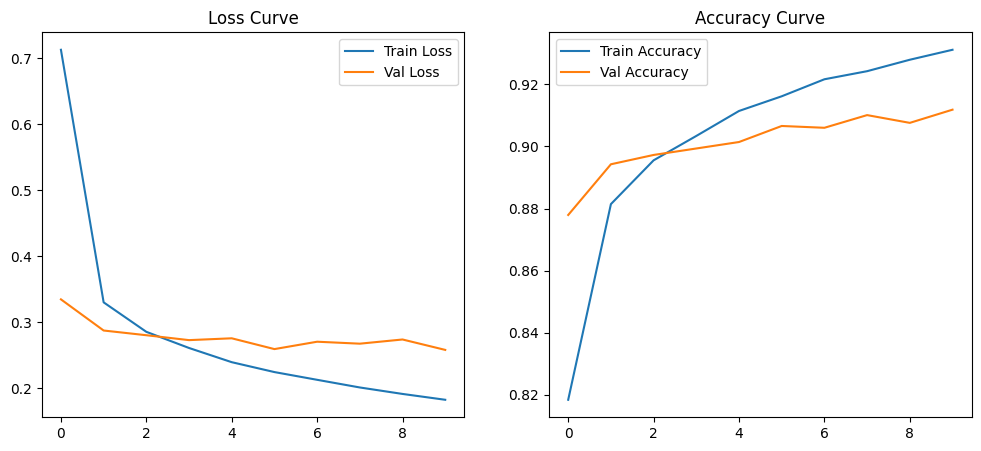

In [19]:
# Plot training curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(df["loss"], label="Train Loss")
plt.plot(df["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(df["accuracy"], label="Train Accuracy")
plt.plot(df["val_accuracy"], label="Val Accuracy")
plt.legend(); plt.title("Accuracy Curve")
plt.show()

In [20]:
# Predictions on TEST set
# --------------------------
pred = np.argmax(model.predict(X_test), axis=1)

print("y_test shape:", y_test.shape)
print("pred shape:", pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
y_test shape: (10000,)
pred shape: (10000,)


In [21]:
# Confusion Matrix + Metrics
# --------------------------
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)

print("Accuracy:", accuracy_score(y_test, pred))
print("Recall:", recall_score(y_test, pred, average='macro'))
print("F1 Score:", f1_score(y_test, pred, average='macro'))


Confusion Matrix:
 [[824   3  11  24   9   1 124   0   4   0]
 [  1 977   0  15   2   0   3   0   2   0]
 [ 18   1 838   9  75   0  59   0   0   0]
 [ 15   7   7 925  23   0  20   0   2   1]
 [  3   0  64  35 848   0  48   0   2   0]
 [  0   0   0   0   0 978   0  12   1   9]
 [ 96   1  53  33  69   0 738   0  10   0]
 [  0   0   0   0   0  11   0 974   0  15]
 [  2   1   2   4   3   2   4   0 982   0]
 [  0   0   0   0   0   3   1  32   0 964]]
Accuracy: 0.9048
Recall: 0.9048
F1 Score: 0.9047020406164228


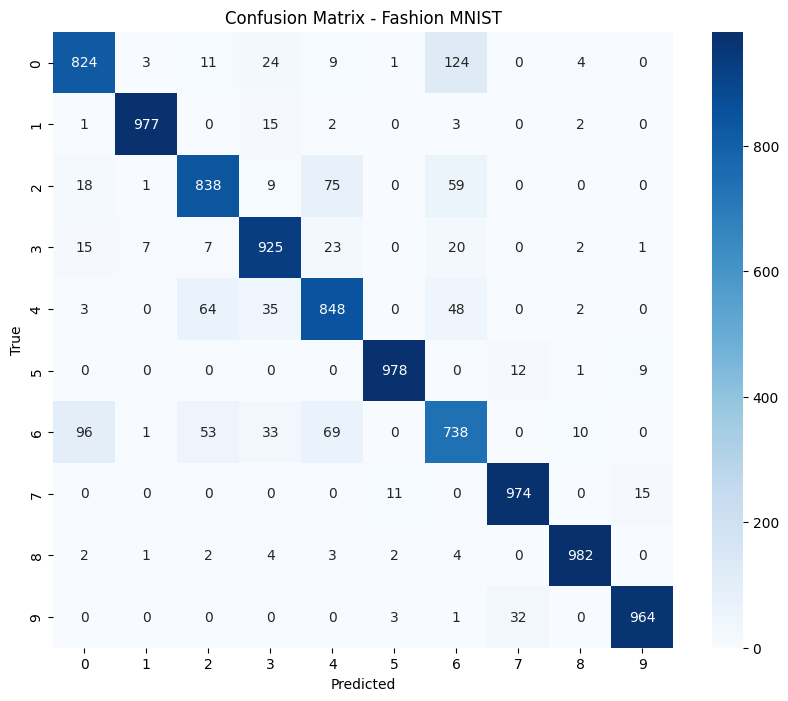

In [22]:
# Plot Confusion Matrix
# --------------------------
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=range(num_classes), 
            yticklabels=range(num_classes))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()

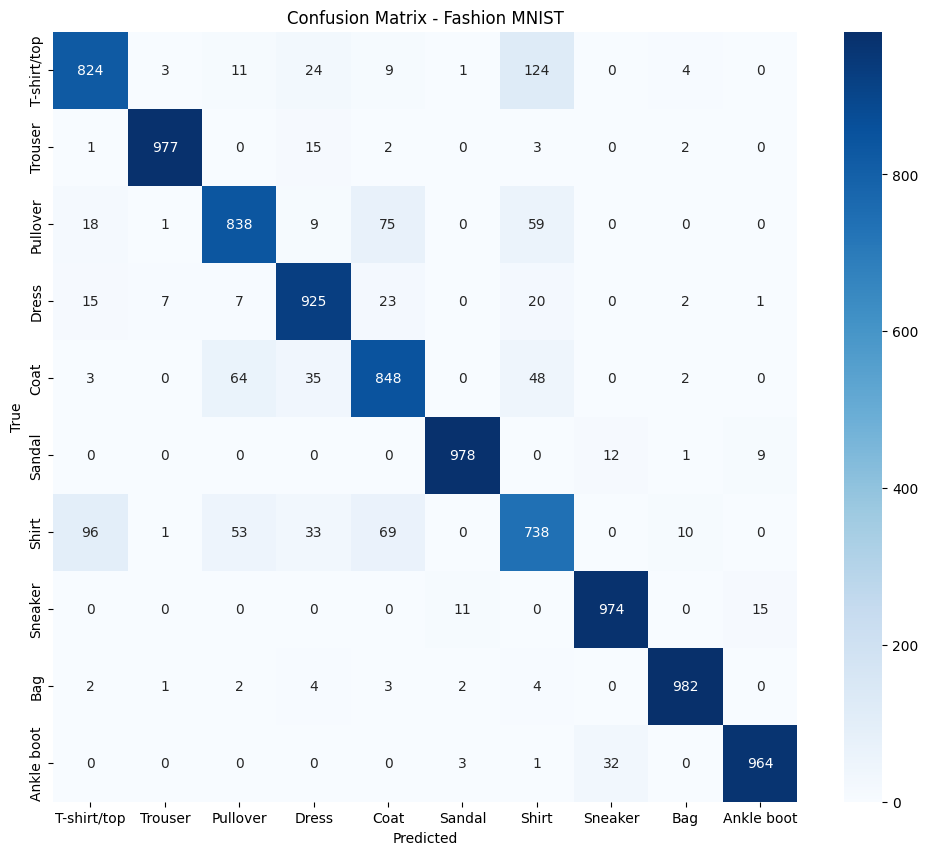

In [23]:
# Fashion MNIST class labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot Confusion Matrix with class labels
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()
